In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [40]:
# Chargement du DataFrame à partir d'un fichier CSV
df = pd.read_csv('data.csv')

In [26]:
# Remplir les valeurs nulles dans certaines colonnes
columns_to_fill = ['salary_max', 'salary_min']  # Ajoutez d'autres colonnes si nécessaire
df[columns_to_fill] = df[columns_to_fill].fillna(0)  # Remplacez 0 par la valeur souhaitée

# Créer un dictionnaire de remplacements pour toutes les colonnes
fill_values = {col: "N/A" for col in df.columns}

# Remplir les valeurs nulles dans toutes les colonnes avec les valeurs de votre choix (par exemple, "N/A")
df = df.fillna(fill_values)

In [27]:
# Analyse des contrats
contract_counts = df['contract_type'].value_counts()
print("Nombre d'offres d'emploi par type de contrat :", contract_counts)

Nombre d'offres d'emploi par type de contrat : N/A         386
CDI         362
MIS         109
CDD         107
contract     14
LIB           2
REP           1
DIN           1
Name: contract_type, dtype: int64


In [28]:
# Le nombre d'alternances
alternance_count = df['title'].str.contains('alternance', case=False).sum()
print(alternance_count)

7


In [29]:
# Analyse des catégories d'emploi
category_counts = df['category'].value_counts()
print("\nNombre d'offres d'emploi par catégorie d'emploi :")
print(category_counts)


Nombre d'offres d'emploi par catégorie d'emploi :
N/A                     582
Emplois Informatique    400
Name: category, dtype: int64


In [30]:
# Analyse des salaires
average_salary = df[['salary_max', 'salary_min']].mean()
print("\nSalaire moyen maximal :", average_salary['salary_max'])
print("Salaire moyen minimal :", average_salary['salary_min'])


Salaire moyen maximal : 16658.78716904277
Salaire moyen minimal : 12028.085539714868


In [31]:
# Analyse de la localisation
location_counts = df['location'].value_counts()
print("\nNombre d'offres d'emploi par emplacement :")
print(location_counts)


Nombre d'offres d'emploi par emplacement :
N/A                              582
France                            52
Paris, Ile-de-France              44
Rhône, Auvergne-Rhône-Alpes       20
Cholet, Maine-et-Loire            12
                                ... 
Aurillac, Cantal                   1
Lanester, Lorient                  1
Meurthe-et-Moselle, Grand-Est      1
Amiens, Somme                      1
Hauts-de-Seine, Ile-de-France      1
Name: location, Length: 86, dtype: int64


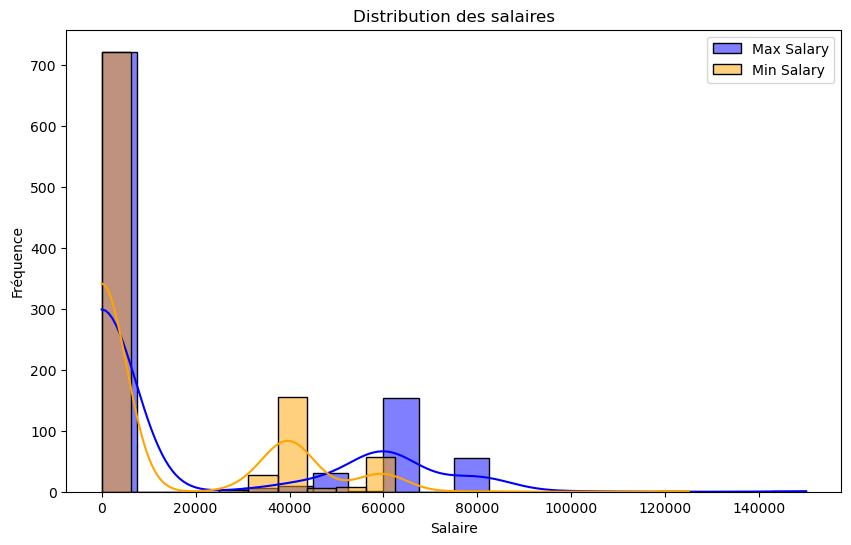

In [38]:
# Distribution des salaires
plt.figure(figsize=(10, 6))
sbn.histplot(data=df, x='salary_max', bins=20, kde=True, color='blue', label='Max Salary')
sbn.histplot(data=df, x='salary_min', bins=20, kde=True, color='orange', label='Min Salary')
plt.xlabel('Salaire')
plt.ylabel('Fréquence')
plt.legend()
plt.title('Distribution des salaires')
plt.show()

In [42]:
# Tendances salariales au fil du temps
df['created'] = pd.to_datetime(df['created'])
df.set_index('created', inplace=True)
df.resample('M')['salary_max', 'salary_min'].mean().plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Salaire moyen')
plt.title('Salaire moyen au fil du temps')
plt.legend()
plt.show()

KeyError: 'created'

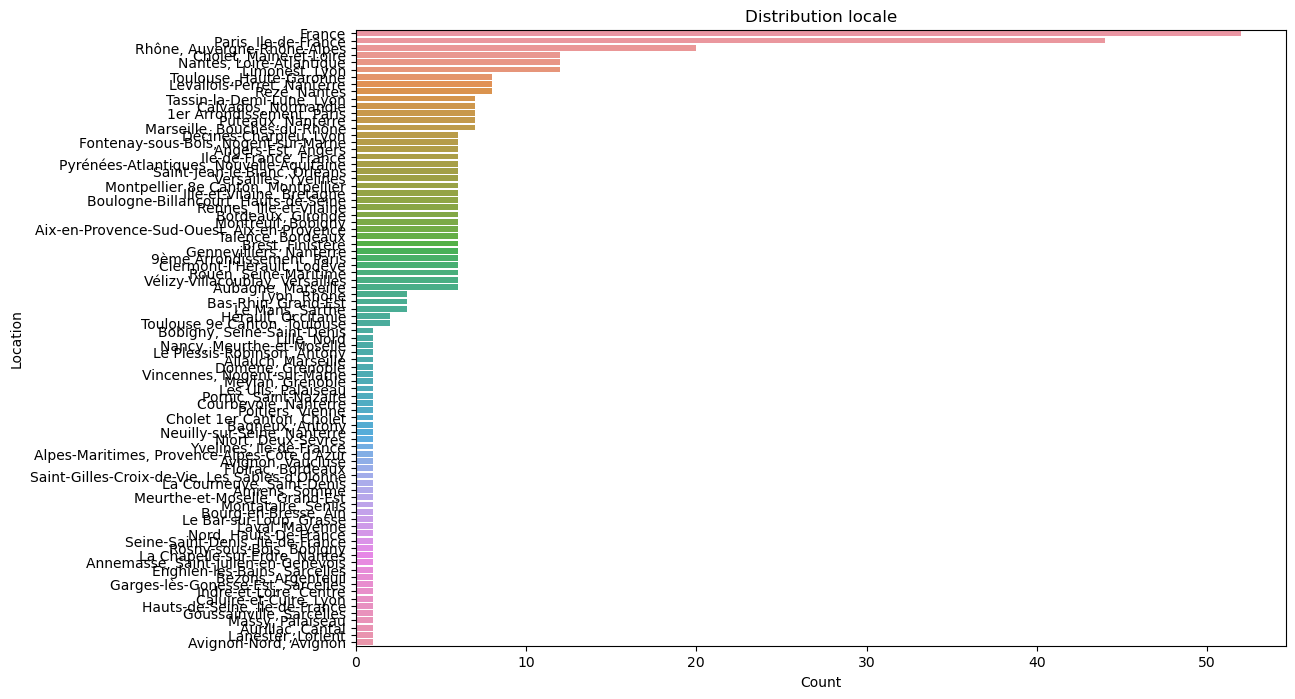

In [48]:
# Répartition géographique
plt.figure(figsize=(12, 8))
sbn.countplot(data=df, y='location', order=df['location'].value_counts().index)
plt.ylabel('Location')
plt.xlabel('Count')
plt.title('Distribution locale')
plt.show()

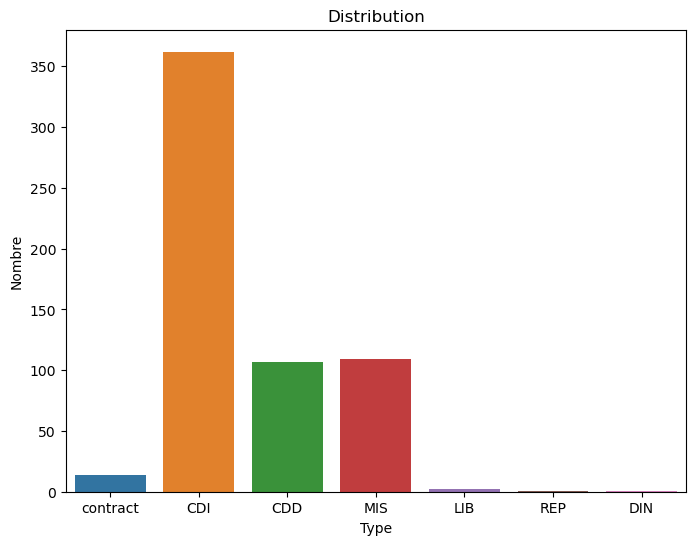

In [53]:
# Type de contrat
plt.figure(figsize=(8, 6))
sbn.countplot(data=df, x='contract_type')
plt.xlabel('Type')
plt.ylabel('Nombre')
plt.title('Distribution')
plt.show()

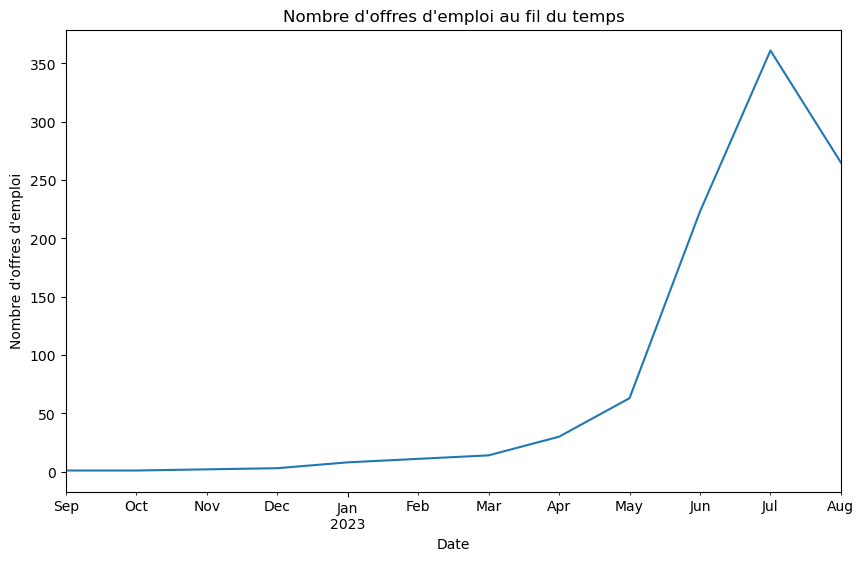

In [57]:
# Analyse temporelle des offres d'emploi
plt.figure(figsize=(10, 6))
df.resample('M').size().plot()
plt.xlabel('Date')
plt.ylabel("Nombre d'offres d'emploi")
plt.title("Nombre d'offres d'emploi au fil du temps")
plt.show()